# Qantitative Analyst Case Study
## Validus

#### Assumptions
Consider a multiperiod binomial asset model for an FX spot rate S with N periods. Under this particular model, we have the following assumptions:

· the initial price of the asset is 𝑆0=1.28065;

· under the risk-neutral measure, the asset price at period j is 𝑆𝑗=(1+𝑣)𝑆𝑗−1 with probability ½, and 𝑆𝑗=(1−𝑣)𝑆𝑗−1 with probability ½, with 0<𝑣<1; and

· domestic and foreign interest rates associated with borrowing/lending a currency for a single time period is 0.

The initial price of the asset is 1.28065

Under the risk neutral meausre, the asseet price at period j is S_j = (1+v) * S_(j-1) and S_j =(1-v) * S_(j-1), each with 0.5 probability. 

Under these asssumption, there is at period j an up and down scenarios which can be denoted as:
u = (1+v)
d = (1-v)
each with 0.5 probability. 

S_j = (S_(j-1) * (u * 0.5)) + (S_(j-1) * (d * 0.5))

1. Implement a function which, given v and the strike K of a European put option on the asset S, expiring after N periods, returns its value V.

In [402]:
%run Functions.ipynb
import pandas as pd
import numpy as np
from scipy.stats import norm
from datetime import date
from numpy_financial import irr


In [403]:
# input
N = 10
v = 0.05
S0 = 1.28065
K = S0

In [381]:
u = (1+v)
d = (1-v)
p = 0.5

In [404]:
V = put_option(S0 = S0, 
               v = v, 
               K = K, 
               N = N, 
               p = p)
print(f'The value of the put option is', V)

The value of the put option is 0.36522993140918225


In [405]:
# Calibrate v to match the given option price
v = calibrate_v(K = K, V = V, N = 10, S0 = S0)
v

0.00016102294921875

In [386]:
max_s0_expectation(v = v, num_paths = 1000)

1.0214282015787468

4. Using the GBPUSD FX spot rate paths, derived from the above binomial model for 𝑁=10 (Δτ=0.5 years),𝑣=0.05, convert the GBP cashflows (provided in the cashflow data spreadsheet) into fund currency (USD) and calculate the IRR (internal rate of return) for each of the paths. Plot the distribution of the IRR values.

In [388]:
# load excel sheet with cash flow information
file_name =  'Quantitative_Analyst_Case_Study_2024_Cashflow_Model.xlsx'
df = pd.read_excel(file_name)


In [202]:
df

,Time,Fund,Cashflow Type,Cashflow Amount (in Local Asset Currecny),Local Asset Currency,Fund Currency,Base Case IRR
0,2024-03-31,Validus V,Equity,-100000000,GBP,USD,0.149925
1,2025-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN
2,2026-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN
3,2027-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN
4,2028-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN
5,2029-03-31,Validus V,Proceeds,115000000,GBP,USD,NaN


In [361]:
# Function to simulate GBPUSD FX spot rate paths
def simulate_fx_spot_rate_paths(N, v, delta_tau, num_paths):
    u = 1 + v
    d = 1 - v
    
    # Initialize array to store simulated FX spot rate paths
    fx_spot_rate_paths = np.zeros((num_paths, N+1))
    
    # Simulate FX spot rate paths
    for i in range(num_paths):
        fx_spot_rate = 1.28065  # Initial GBPUSD FX spot rate
        for j in range(N+1):
            fx_spot_rate_paths[i][j] = fx_spot_rate
            fx_spot_rate *= np.random.choice([u, d], p=[0.5, 0.5])
    
    return fx_spot_rate_paths


In [389]:
# Given parameters
N = 10  # Number of periods
v = 0.05  # Price movement factor
delta_tau = 0.5  # Time interval in years
num_paths = 6  # Number of simulated paths

# Simulate FX spot rate paths
fx_spot_rate_paths = simulate_fx_spot_rate_paths(N, v, delta_tau, num_paths)

In [390]:
results = [df['Base Case IRR'][0]]
df['time'] = df.index


In [391]:
for i in df.index:
    df1 = pd.DataFrame({'path': fx_spot_rate_paths[i],
                        "time": np.arange(0, 5.5, 0.5)})
    
    inner_join_df = pd.merge(df, df1, on='time', how='inner')
    cashflow = inner_join_df['Cashflow Amount (in Local Asset Currecny)']/inner_join_df['path']

    irr_value = irr(cashflow)
    results.append(irr_value)

/var/folders/gc/3nx2jxd91p9crs2vh_4k6ldw0000gn/T/ipykernel_34656/2406110382.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  inner_join_df = pd.merge(df, df1, on='time', how='inner')
/var/folders/gc/3nx2jxd91p9crs2vh_4k6ldw0000gn/T/ipykernel_34656/2406110382.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  inner_join_df = pd.merge(df, df1, on='time', how='inner')
/var/folders/gc/3nx2jxd91p9crs2vh_4k6ldw0000gn/T/ipykernel_34656/2406110382.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  inner_join_df = pd.merge(df, df1, on='time', how='inner')
/var/folders/gc/3nx2jxd91p9crs2vh_4k6ldw0000gn/T/ipykernel_34656/2406110382.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  inner_join

In [392]:
results

[0.14992492794990545,
 0.15646072818930978,
 0.1081323955639204,
 0.19759520282256204,
 0.1541881052146159,
 0.17027404631050347,
 0.20686417611526942]

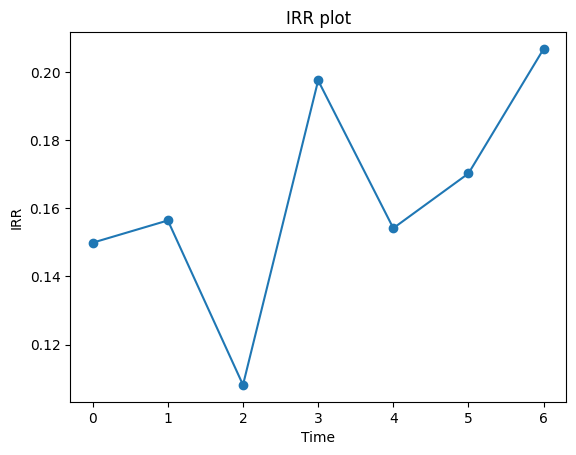

In [397]:
# Plot the values
plt.plot(results, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('IRR')
plt.title('IRR plot')

# Show the plot
plt.show()


In [80]:
def generate_fx_spot_rate_paths(N, v, path, S0):
    u = 1+v
    d = 1-v
    p = 0.5

    # generate random numbers
    np.random.seed(45)
    num = np.random.rand(path, N)

    # prices for each period
    SN = S0 * np.cumprod(np.where(num>p, u, d), axis = 1)

    # convert to FX rates
    FX_Rates = SN/S0

    return FX_Rates

In [98]:
FX = generate_fx_spot_rate_paths(N = 10, v = 0.05, path = 6, S0 = S0)
print(FX)

[[1.05       1.1025     1.047375   0.99500625 0.94525594 0.89799314
  0.85309348 0.81043881 0.76991687 0.80841271]
 [1.05       1.1025     1.157625   1.09974375 1.15473094 1.09699439
  1.15184411 1.20943632 1.1489645  1.09151627]
 [1.05       0.9975     0.947625   0.90024375 0.85523156 0.81246998
  0.85309348 0.81043881 0.85096075 0.80841271]
 [1.05       0.9975     1.047375   0.99500625 1.04475656 0.99251873
  0.9428928  0.99003744 0.94053557 0.89350879]
 [1.05       0.9975     1.047375   0.99500625 0.94525594 0.99251873
  1.04214467 0.99003744 1.03953931 0.98756234]
 [0.95       0.9025     0.947625   0.99500625 0.94525594 0.89799314
  0.9428928  0.99003744 0.94053557 0.89350879]]


Assume we would like to buy a GBPUSD European put option to hedge our FX exposure. If the USD and GBP interest rates are 0% throughout the time horizon of the fund, calculate the option’s fair market value (premium) at trade date (t = 0). See the option details below:

· Trade date: 31/03/2024

· Expiry Date: 31/03/2029

· Notional Amount: 100,000,000 GBP

· Strike 𝐾=𝑆0=1.28065


In [338]:
# Define the option parameters
S0 = 1.28065  # spot price of GBPUSD on trade date
K = S0  # strike price
T = (date(2029, 3, 31) - date(2024, 3, 31)).days / 365  # time to expiry in years
r = 0  # risk-free interest rate
sigma = 0.15  # volatility of GBPUSD
notional = 100000000 

# Calculate the option value using the Black-Scholes model
d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
V = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

# Convert the option value to GBP
premium = V * notional

print(f"The fair market value of the put option at time t = 0 is:",premium, "GBP")

The fair market value of the put option at time t = 0 is: 17060929.17246159 GBP


6. Calculate the IRR of the hedged portfolio, including the option premium payment you calculated in (5) and the option payoff. Plot the distribution of the hedged portfolio IRR values.

In [ ]:
# Example cash flows (replace with actual cash flows)
cashflows_hedged_portfolio = [-100, 50, 60, 70, 80, 90, 100]  # Include option premium payment
cashflows_option_payoff = [0, -20, -30, -40, -50, -60, -70]  # Include option payoff

# Calculate total cash flows for each period
total_cashflows = [x + y for x, y in zip(cashflows_hedged_portfolio, cashflows_option_payoff)]

# Calculate IRR of the total cash flows
irr_value = irr(total_cashflows)

print("IRR of the hedged portfolio:", irr_value)